<a href="https://colab.research.google.com/github/BoshiLee/pytorch_learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 

## 建立資料集

make_blobs 參數解釋：

n_samples(int/array):如果參數爲int，代表總樣本數；如果參數爲array-like，數組中的每個數代表每一簇的樣本數。默認值100

n_features(int):樣本點的維度。默認值2

centers(int):樣本中心數。如果樣本數爲int且centers=None，生成三個樣本中心；如果樣本數（n_samples）爲數組，則centers 要麼爲None，要麼爲數組的長度。默認值3

cluster_std(float/sequence of floats):樣本中，簇的標準差。默認值1.0

center_box(pair of floats (min, max)):每個簇的上下限。默認值(-10.0, 10.0)

shuffle(boolean):是否將樣本打亂。默認值True

random_state(int/RandomState instance /None):指定隨機數種子，每個種子生成的序列相同，與minecraft地圖種子同理。

In [3]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(100, 1))

## 繪製資料集

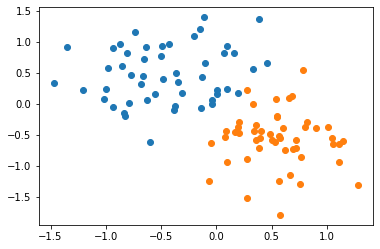

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1]) #取得 y = 0 的第0 /1 個元素
  plt.scatter(X[y==1, 0], X[y==1, 1])

scatter_plot()

## Perceptorn
定義一個感知器，可以分類橘色和藍色的群組

In [5]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [6]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
def get_params(model: Model):
  w, b = model.parameters()
  w0, w1 = w.view(2) # 將原本 2 為陣列轉乘 1 維包含兩個元素
  return (w0.item(), w1.item(), b[0].item())

print(get_params(model))

(0.1622033268213272, -0.1682732254266739, 0.1939089596271515)


In [8]:
def plot_fit(title: str):
  plt.title = title
  # 0 = w1x1 + w2x2 + b #x2 移到等號左邊來對應
  w1, w2, b = get_params(model)
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b) / -w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

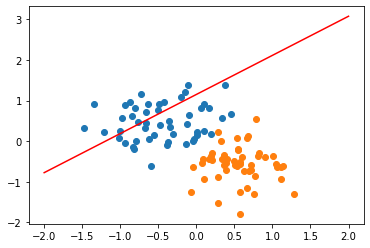

In [9]:
plot_fit("Initial")

## Loss Function
使用二元分類器的 cross entorpy 會使用的损失函数是二值交叉熵/对数(binary cross-entropy / log) nn.BCELoss


In [10]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) #使用梯度下降法更新 model 參數


In [11]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred, y_data.float())
  print('epoch:', i, 'loss:', loss.item())
  losses.append(loss)
  criterion.zero_grad()
  loss.backward()
  optimizer.step()
  

epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.617464005947113
epoch: 2 loss: 0.6153760552406311
epoch: 3 loss: 0.6122612953186035
epoch: 4 loss: 0.6081402897834778
epoch: 5 loss: 0.603040337562561
epoch: 6 loss: 0.5969947576522827
epoch: 7 loss: 0.590043306350708
epoch: 8 loss: 0.5822310447692871
epoch: 9 loss: 0.5736084580421448
epoch: 10 loss: 0.564230740070343
epoch: 11 loss: 0.5541573166847229
epoch: 12 loss: 0.5434510111808777
epoch: 13 loss: 0.532177746295929
epoch: 14 loss: 0.5204054117202759
epoch: 15 loss: 0.5082032680511475
epoch: 16 loss: 0.49564141035079956
epoch: 17 loss: 0.48278942704200745
epoch: 18 loss: 0.46971622109413147
epoch: 19 loss: 0.45648878812789917
epoch: 20 loss: 0.44317176938056946
epoch: 21 loss: 0.4298267066478729
epoch: 22 loss: 0.4165114164352417
epoch: 23 loss: 0.40327969193458557
epoch: 24 loss: 0.3901808559894562
epoch: 25 loss: 0.37725937366485596
epoch: 26 loss: 0.36455485224723816
epoch: 27 loss: 0.3521019220352173
epoch: 28 loss: 0.339930295

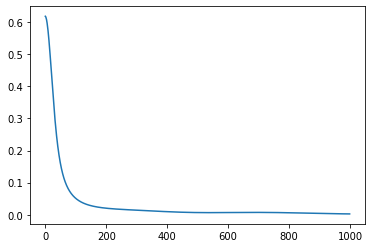

In [12]:
plt.plot(range(epochs), losses)
plt.xlabel = "epoch"
plt.ylabel = "loss"
plt.show()

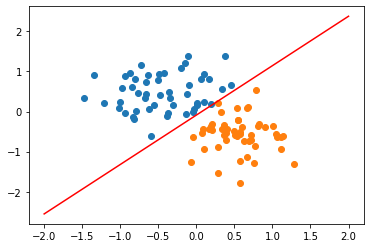

In [13]:
plot_fit("Trained Model")

## Testing Model
使用隨意兩點去測試 model 是否能正確分類，第一個印出機率，第二個預測點是在哪一個群組

Red point postive probability = 1.0
Black point postive probability = 0.0
Red point in class 1
Black point in class 0


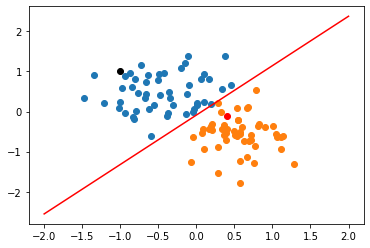

In [23]:
point1 = torch.tensor([0.4, -0.1])
point2 = torch.tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point postive probability = {}".format(model.forward(point1).item()))
print("Black point postive probability = {}".format(model.forward(point2).item()))
print("Red point in class {}".format(model.predict(point1)))
print("Black point in class {}".format(model.predict(point2)))

plot_fit("Trained Model")

參考資料：
1. [線性分類-感知器(Perceptron) 介紹](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-2%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E6%84%9F%E7%9F%A5%E5%99%A8-perceptron-%E4%BB%8B%E7%B4%B9-84d8b809f866)

2. [BCE Loss 圖解](https://zhuanlan.zhihu.com/p/89391305)
3. [SGD-準確率梯度下降法 (stochastic gradient decent)](https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db)